## LOAD LIBRARIES

In [1]:
import numpy as np
import pandas as pd #used for data import and manipulation
import sklearn as sk
import seaborn as sns # for plotting
from matplotlib import pyplot as plt # for plotting and manipulating plots
import random

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers

In [5]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [6]:
import category_encoders as ce

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix 

# Loading Dataset

In [8]:
col_names = ['Age','Workclass','Fnlwgt','Education','Education-num','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
Adult_data=pd.read_csv('adult.data',names = col_names,na_values = ' ?')
Adult_test=pd.read_csv('adult.test',names = col_names,na_values = ' ?', skiprows=[0])

In [9]:
Adult = pd.concat([Adult_data,Adult_test])

In [10]:
Adult = Adult.reset_index(drop=True)

In [11]:
Adult.info()
Adult.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  Native-country  47985 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
Adult.tail()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


# Exploratory data analysis

count missing observation

In [13]:
Adult.isnull().sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
Income               0
dtype: int64

# Summary Statistics for Numeric Values

In [14]:
Adult.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Distribution of numeric variables

In [15]:
numeric_vars=[
    'Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hours-per-week'
]

In [16]:
len(numeric_vars)

6

In [17]:
Adult.Income=np.where(Adult.Income == ' <=50K.', ' <=50K', Adult.Income)
Adult.Income=np.where(Adult.Income == ' >50K.', ' >50K', Adult.Income)

In [18]:
Adult.to_csv('adult_dataset.csv',index=False)

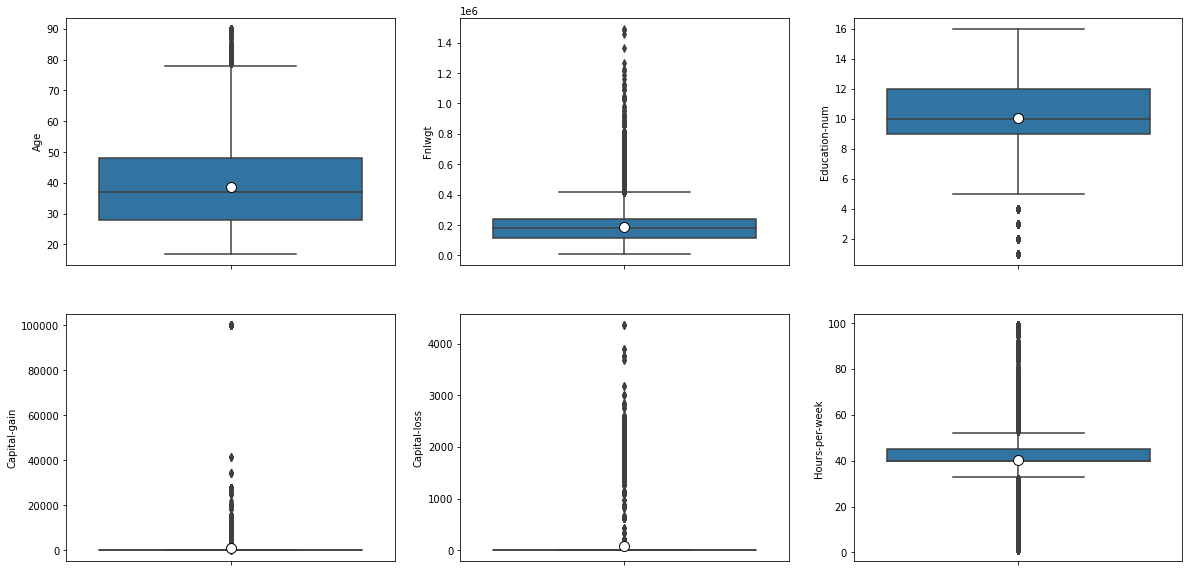

In [19]:
plt.figure(figsize=(20, 10))
for plot in range(len(numeric_vars)):
    plt.subplot(2, 3, plot+1)
    sns.boxplot(y=Adult[numeric_vars[plot]], showmeans=True, meanprops={ "marker": 'o', 'markerfacecolor':'white',
                                                                             'markeredgecolor': 'black', "markersize":"10"
    })
plt.show()

# Scatterplot matrix

<Figure size 720x720 with 0 Axes>

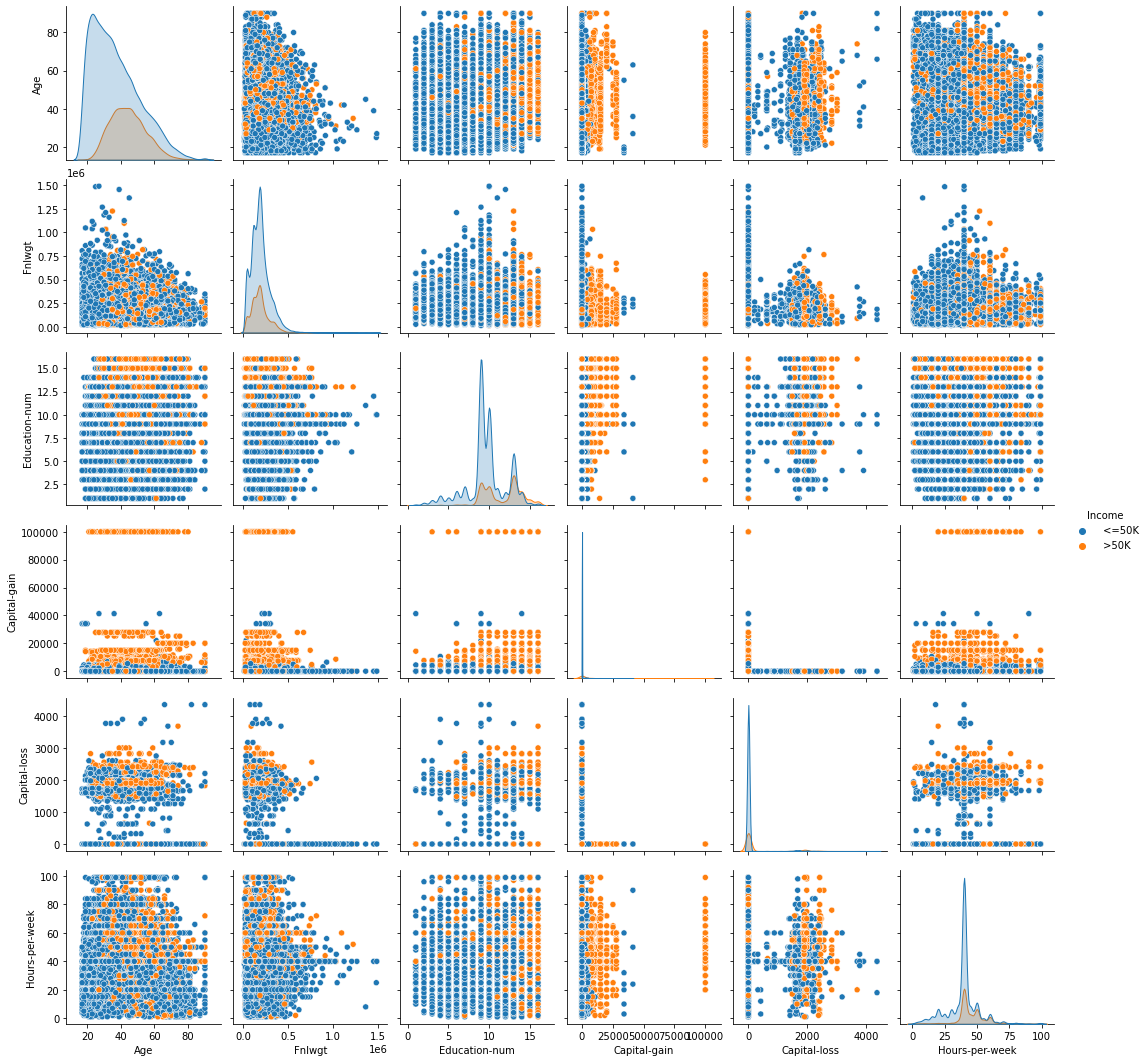

In [20]:
plt.figure(figsize=(10, 10))
sns.pairplot(Adult[[
    'Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hours-per-week','Income'
]],hue ='Income')
plt.show()

# Exploring non-numeric variables

In [21]:
#Adult.Income.str.replace('.', '').value_counts()

In [22]:
Adult.Income.value_counts()

 <=50K    37155
 >50K     11687
Name: Income, dtype: int64

In [23]:
Adult.Income.value_counts(normalize=True)

 <=50K    0.760718
 >50K     0.239282
Name: Income, dtype: float64

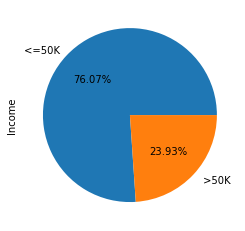

In [24]:
Adult.Income.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [25]:
categorical_cols=Adult.columns[Adult.dtypes=='object'].to_list()

In [26]:
for col in categorical_cols:
    print(f'========\n{col}\n========')
    print(f'{Adult[col].value_counts(dropna=False)}\n')

Workclass
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
NaN                   2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64

Education
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: Education, dtype: int64

Marital-status
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: Marital-status, dtype: int64

Occupation
 Prof-specialty      

In [27]:
len(categorical_cols)

9

In [28]:
Adult.index[Adult['Native-country']==' Holand-Netherlands']

Int64Index([19609], dtype='int64')

In [29]:
Adult=Adult.drop(19609,axis=0).reset_index(drop=True)

In [30]:
Adult = Adult.reset_index(drop=True)

In [31]:
Adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       46042 non-null  object
 2   Fnlwgt          48841 non-null  int64 
 3   Education       48841 non-null  object
 4   Education-num   48841 non-null  int64 
 5   Marital-status  48841 non-null  object
 6   Occupation      46032 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Sex             48841 non-null  object
 10  Capital-gain    48841 non-null  int64 
 11  Capital-loss    48841 non-null  int64 
 12  Hours-per-week  48841 non-null  int64 
 13  Native-country  47984 non-null  object
 14  Income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [32]:
categorical_cols.remove('Native-country')

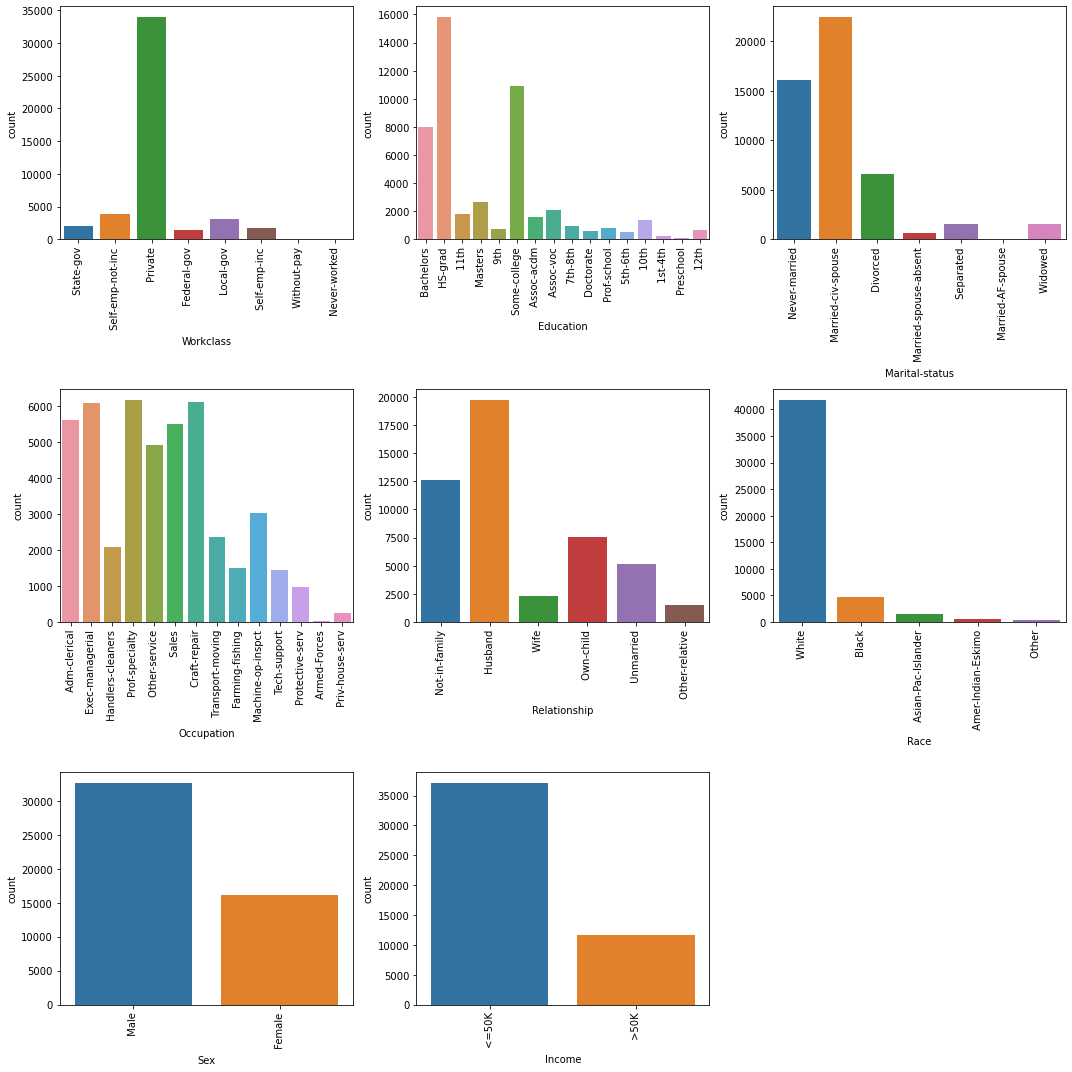

In [33]:
plt.figure(figsize=(15, 15))
for plot in range(len(categorical_cols)):
    plt.subplot(3, 3, plot+1)
    plt.xticks(rotation='vertical')
    sns.countplot(x=Adult[categorical_cols[plot]])

plt.tight_layout()
plt.show()

In [34]:
Adult['Native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 Peru                             46
 

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

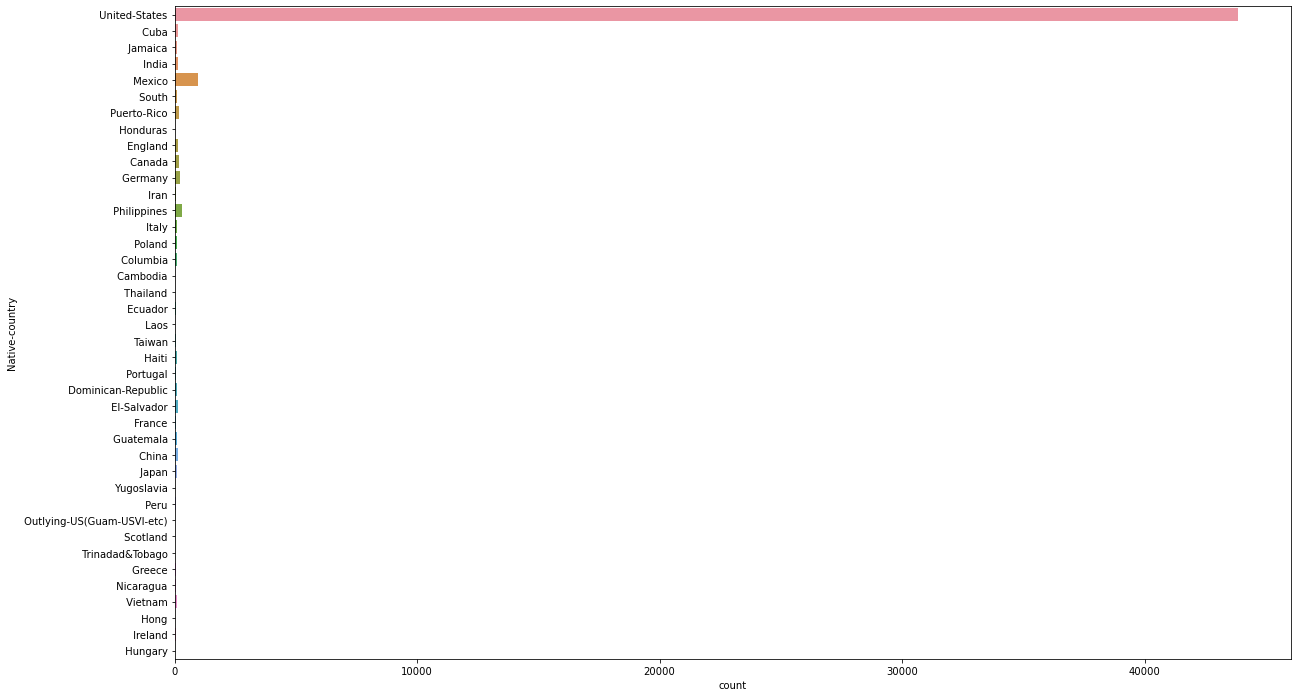

In [35]:
plt.figure(figsize=(20,12))
sns.countplot(y=Adult['Native-country'])
plt.xticks

# Feature Engineering!

Feature Improvement
1. Input missing observation
2. value normalisation

Treating Missing obs
Numeric Missing Obs
1. Median Imputation

Non-Numeric Missing Obs
1. Most frequeny category imputation
2. Arbitrary category imputation

In [36]:
Adult[numeric_vars]

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48836,39,215419,13,0,0,36
48837,64,321403,9,0,0,40
48838,38,374983,13,0,0,50
48839,44,83891,13,5455,0,40


In [37]:
fill_num_vars = SimpleImputer(strategy='median')

In [38]:
pd.DataFrame(fill_num_vars.fit_transform(Adult[numeric_vars]))

,0,1,2,3,4,5
0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,50.0,83311.0,13.0,0.0,0.0,13.0
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
4,28.0,338409.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...,...
48836,39.0,215419.0,13.0,0.0,0.0,36.0
48837,64.0,321403.0,9.0,0.0,0.0,40.0
48838,38.0,374983.0,13.0,0.0,0.0,50.0
48839,44.0,83891.0,13.0,5455.0,0.0,40.0


Working with Categorical Variables
One-hot encoding

In [39]:
encoder=OneHotEncoder(sparse=False)

encoder.fit_transform(Adult[['Workclass','Occupation','Native-country']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
encoder.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
        nan], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving', nan], dtype=object),
 array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
        ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
        ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
        ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland',
        ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
        ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland',
        ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
        ' Tha

Multi-label columns

In [41]:
mlb=MultiLabelBinarizer()

In [42]:
mlb.fit_transform([(1,2), (3,)])

array([[1, 1, 0],
       [0, 0, 1]])

In [43]:
x = Adult.iloc[:,0:14].values
y = Adult.iloc[:,14].values

# Classify into train and test data

In [44]:
X, y = Adult.drop('Income', axis=1), Adult.Income

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, 
    random_state=42,
    stratify=y  # stratify =y makes sure the split is representative of the target variable
) 

In [46]:
y_test.value_counts(normalize=True)

 <=50K    0.760672
 >50K     0.239328
Name: Income, dtype: float64

In [47]:
y_train.value_counts(normalize=True)

 <=50K    0.760724
 >50K     0.239276
Name: Income, dtype: float64

In [48]:
Adult.Income.value_counts(normalize=True)

 <=50K    0.760713
 >50K     0.239287
Name: Income, dtype: float64

In [49]:
non_numeric_cols = ['Workclass','Education','Marital-status','Occupation','Relationship','Race','Sex','Native-country']
numeric_cols = Adult.columns[Adult.dtypes!='object'].to_list()

In [50]:
numeric_cols

['Age',
 'Fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

In [51]:
non_numeric_cols

['Workclass',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-country']

In [52]:
numeric_pipeline= Pipeline(steps=[
    ('select_numeric_cols', FunctionTransformer(lambda df: df[numeric_cols])),
    ('imput', SimpleImputer(strategy='median')),
    ('normalize', StandardScaler())
])
numeric_pipeline

Pipeline(steps=[('select_numeric_cols',
                 FunctionTransformer(func=<function <lambda> at 0x000001A28BB71820>)),
                ('imput', SimpleImputer(strategy='median')),
                ('normalize', StandardScaler())])

In [53]:
non_numeric_pipeline = Pipeline(steps=[
    ('select_non_numeric_cols', FunctionTransformer(lambda df: df[non_numeric_cols])),
    ('imput', SimpleImputer(strategy='constant', fill_value='No')),
    ('encoder', OneHotEncoder(sparse=False))
])
non_numeric_pipeline

Pipeline(steps=[('select_non_numeric_cols',
                 FunctionTransformer(func=<function <lambda> at 0x000001A28BB794C0>)),
                ('imput', SimpleImputer(fill_value='No', strategy='constant')),
                ('encoder', OneHotEncoder(sparse=False))])

In [54]:
feature_engineering = FeatureUnion([
    ('non_numeric_pipe', non_numeric_pipeline),
    ('numeric_pipe', numeric_pipeline)
])

feature_engineering

FeatureUnion(transformer_list=[('non_numeric_pipe',
                                Pipeline(steps=[('select_non_numeric_cols',
                                                 FunctionTransformer(func=<function <lambda> at 0x000001A28BB794C0>)),
                                                ('imput',
                                                 SimpleImputer(fill_value='No',
                                                               strategy='constant')),
                                                ('encoder',
                                                 OneHotEncoder(sparse=False))])),
                               ('numeric_pipe',
                                Pipeline(steps=[('select_numeric_cols',
                                                 FunctionTransformer(func=<function <lambda> at 0x000001A28BB71820>)),
                                                ('imput',
                                                 SimpleImputer(strategy='median')),
                                                ('normalize',
                                                 StandardScaler())]))])

# K-NN Model

In [55]:
KNN_model = Pipeline(steps=[
    ('feature_engineering', feature_engineering),
    ('classifier', KNeighborsClassifier(n_jobs=-1))
])

KNN_model.fit(X_train, y_train)

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('non_numeric_pipe',
                                                 Pipeline(steps=[('select_non_numeric_cols',
                                                                  FunctionTransformer(func=<function <lambda> at 0x000001A28BB794C0>)),
                                                                 ('imput',
                                                                  SimpleImputer(fill_value='No',
                                                                                strategy='constant')),
                                                                 ('encoder',
                                                                  OneHotEncoder(sparse=False))])),
                                                ('numeric_pipe',
                                                 Pipeline(steps=[('select_numeric_cols',
                                                                  FunctionTransformer(func=<function <lambda> at 0x000001A28BB71820>)),
                                                                 ('imput',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('normalize',
                                                                  StandardScaler())]))])),
                ('classifier', KNeighborsClassifier(n_jobs=-1))])

In [56]:
KNN_predict = KNN_model.predict(X_test)

In [57]:
KNN_model.classes_

array([' <=50K', ' >50K'], dtype=object)

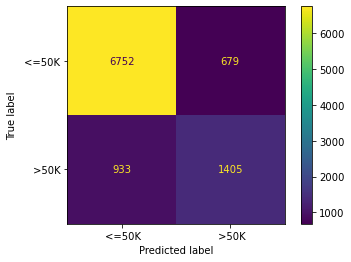

In [58]:
cm = confusion_matrix(y_test, KNN_predict, labels=KNN_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN_model.classes_)
disp.plot()
plt.show()

In [59]:
print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7431
        >50K       0.67      0.60      0.64      2338

    accuracy                           0.83      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769



# Hyperparameter Tuning

use of Grid search approach

In [60]:
n_neighbor_grid=range(1,10)
parameter_grid = {'classifier__n_neighbors': n_neighbor_grid}

knn_cv = GridSearchCV(KNN_model, parameter_grid, n_jobs=-1, verbose=1)
knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('non_numeric_pipe',
                                                                        Pipeline(steps=[('select_non_numeric_cols',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x000001A28BB794C0>)),
                                                                                        ('imput',
                                                                                         SimpleImputer(fill_value='No',
                                                                                                       strategy='constant')),
                                                                                        ('encoder',
                                                                                         OneHotEncoder(sparse=False))])),
                                                                       ('numeric_pipe',
                                                                        Pipeline(steps=[('select_numeric_cols',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x000001A28BB71820>)),
                                                                                        ('imput',
                                                                                         SimpleImputer(strategy='median')),
                                                                                        ('normalize',
                                                                                         StandardScaler())]))])),
                                       ('classifier',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'classifier__n_neighbors': range(1, 10)},
             verbose=1)

In [61]:
knn_cv.best_params_

{'classifier__n_neighbors': 9}

In [62]:
cv_results=knn_cv.cv_results_['mean_test_score']

In [63]:
knn_cv.cv_results_

{'mean_fit_time': array([0.49957771, 0.72491431, 0.61666479, 0.79593735, 0.60981712,
        0.710325  , 0.6332036 , 0.9070323 , 0.84599066]),
 'std_fit_time': array([0.06690297, 0.22195274, 0.03318756, 0.16134998, 0.13138648,
        0.12425494, 0.12593006, 0.17518261, 0.13105949]),
 'mean_score_time': array([44.27371545, 32.58314838, 34.43526154, 36.06917677, 33.12417302,
        33.04479575, 41.09900427, 40.99756541, 33.23459201]),
 'std_score_time': array([6.13269365, 1.12093742, 1.22350911, 2.68171893, 1.33173297,
        2.12371518, 7.04375585, 2.9448868 , 7.2999577 ]),
 'param_classifier__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__n_neighbors': 1},
  {'classifier__n_neighbors': 2},
  {'classifier__n_neighbors': 3},
  {'classifier__n_neighbors': 4},
  {'classifier__n_neighbors': 5},


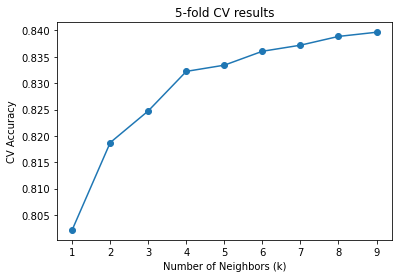

In [64]:
plt.plot(range(1,10), cv_results, 'o-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('CV Accuracy')
plt.title('5-fold CV results')
plt.show()

# Predicting with the best k

In [65]:
KNN_predict_final = knn_cv.best_estimator_.predict(X_test)

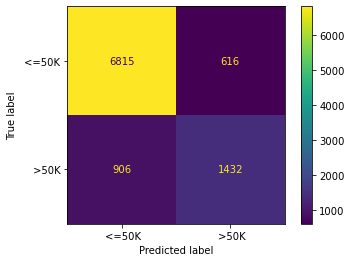

In [66]:
cm2 = confusion_matrix(y_test, KNN_predict_final, labels=KNN_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=KNN_model.classes_)
disp.plot()
plt.show()

In [67]:
print(classification_report(y_test, KNN_predict_final))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7431
        >50K       0.70      0.61      0.65      2338

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.78      9769
weighted avg       0.84      0.84      0.84      9769



### Classification Metrics¶

Confusion matrix contains four metrics:

We assume that positive prediction is <=50k.

True Positive: Adult correctly classified as earning income less than or equal to $50k/year (6815)

True Negative: Adult correctly classified as earning income greater than $50k/year (1432)

False Positive: Adult incorrectly classified as earning income less than or equal to $50k/year (906)

False Negative: Adult incorrectly classified as earning income greater than $50k/year (616)

Accuracy =  𝑃(𝑌̂ =𝑌) 
Accuracy tells us how often our prediction is correct on the testing set.

Precision: when my model predicts income less than or equal to $50k/year (positive), how often is it correct? (88%)

𝑃(𝑌=𝐻1𝑁1|𝑌̂ =𝐻1𝑁1)
 
Recall: when an adult earns <= $50k/yr, how  often does  our  model  predict  <=$50k/yr.

𝑃(𝑌̂ =𝐻1𝑁1|𝑌=𝐻1𝑁1)

# Neural Network

In [68]:
X_train_nn = feature_engineering.fit_transform(X_train)
X_test_nn = feature_engineering.transform(X_test)

In [69]:
le=LabelEncoder()
le.fit(y_train)

y_train_nn=le.transform(y_train)
y_test_nn=le.transform(y_test)

In [70]:
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [71]:
X_train_nn.shape[1]

107

In [72]:
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

In [73]:
set_seed()
model = keras.Sequential([
    keras.Input(shape = (X_train_nn.shape[1],), name='Input_layer'),
    layers.Dense(units=128, activation='relu', name='Hidden_layer'),
    layers.Dense(units=1, activation='sigmoid')
], name= 'initial_model')

model.summary()

Model: "initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer (Dense)        (None, 128)               13824     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [74]:
128*107

13696

In [75]:
13696 + (128)

13824

In [76]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [77]:
history=model.fit(X_train_nn, y_train_nn,
                 batch_size=32, 
                 epochs= 15,
                 verbose=1,
                 validation_split=0.2)

Epoch 1/15
977/977 [==============================] - 4s 3ms/step - loss: 0.3305 - accuracy: 0.8448 - val_loss: 0.3106 - val_accuracy: 0.8562
Epoch 2/15
977/977 [==============================] - 2s 2ms/step - loss: 0.3080 - accuracy: 0.8549 - val_loss: 0.3090 - val_accuracy: 0.8586
Epoch 3/15
977/977 [==============================] - 2s 2ms/step - loss: 0.3037 - accuracy: 0.8570 - val_loss: 0.3109 - val_accuracy: 0.8612
Epoch 4/15
977/977 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8593 - val_loss: 0.3107 - val_accuracy: 0.8591
Epoch 5/15
977/977 [==============================] - 2s 2ms/step - loss: 0.2979 - accuracy: 0.8596 - val_loss: 0.3129 - val_accuracy: 0.8612
Epoch 6/15
977/977 [==============================] - 2s 2ms/step - loss: 0.2960 - accuracy: 0.8607 - val_loss: 0.3122 - val_accuracy: 0.8563
Epoch 7/15
977/977 [==============================] - 2s 2ms/step - loss: 0.2936 - accuracy: 0.8625 - val_loss: 0.3112 - val_accuracy: 0.8585
Epoch 

In [78]:
model.predict(X_test_nn)

306/306 [==============================] - 0s 1ms/step


array([[0.01718212],
       [0.01800941],
       [0.0003139 ],
       ...,
       [0.3075923 ],
       [0.0194403 ],
       [0.21821342]], dtype=float32)

In [79]:
model.evaluate(X_test_nn, y_test_nn)

306/306 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8539


[0.31808313727378845, 0.8539257049560547]

In [80]:
np.round(model.predict(X_test_nn))

306/306 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [81]:
nn_pred=np.round(model.predict(X_test_nn))

306/306 [==============================] - 0s 1ms/step


In [82]:
nn_pred=nn_pred.ravel()

In [83]:
q=nn_pred.ravel().astype(int)

In [84]:
nn_pred_final=le.inverse_transform(q)

In [85]:
print(classification_report(y_test, nn_pred_final))

              precision    recall  f1-score   support

       <=50K       0.90      0.91      0.90      7431
        >50K       0.71      0.66      0.69      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.79      0.80      9769
weighted avg       0.85      0.85      0.85      9769



In [86]:
def evelauate_model(y_true, y_pred, model_name):
    
    accuracy=accuracy_score(y_true=y_true, y_pred=y_pred)
    precision= precision_score(y_true=y_true, y_pred=y_pred, pos_label=' <=50K')
    recall=recall_score(y_true=y_true, y_pred=y_pred, pos_label=' <=50K')
    f1=f1_score(y_true=y_true, y_pred=y_pred, pos_label=' <=50K')
    
    scored_df = pd.DataFrame({
        model_name: [accuracy, precision, recall, f1]
    }, index= ['Accuracy', 'Precision', 'Recall', 'F1'])
    
    return scored_df

In [87]:
nn_pred_test = evelauate_model(y_test, nn_pred_final, 'Neural Networks')
KNN_pred_test= evelauate_model(y_test, KNN_predict_final, 'K-Nearest Neighbors')

In [88]:
pd.concat([nn_pred_test, KNN_pred_test], axis=1)

,Neural Networks,K-Nearest Neighbors
Accuracy,0.853926,0.844201
Precision,0.896461,0.882658
Recall,0.913471,0.917104
F1,0.904886,0.899551
